 **KNN Algoritmasının (uzun yoldan) Scikit-Learn Olmadan Yapılması:**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

In [4]:
#veri oluşturan fonksiyon
def veri_olustur():
    
    #bir dizi oluşturup içine x,y sıralı değerler yazıyoruz
    features= np.array(
        [[2.88, 3.05], [3.1, 2.45], [3.05, 2.8], [2.9, 2.7], [2.75, 3.4],
         [3.23, 2.9], [3.2, 3.75], [3.5, 2.9], [3.65, 3.6],[3.35, 3.3]])
    
    #burada ilk beşini A classı, kalan beşini ise B classı olarak adlandırıyoruz
    labels=['A','A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
    
    return features, labels

In [5]:
#fonksiyonu çağırıp veriyi oluşturuyoruz

features, labels= veri_olustur()

In [6]:
print("features:\n", features)

features:
 [[2.88 3.05]
 [3.1  2.45]
 [3.05 2.8 ]
 [2.9  2.7 ]
 [2.75 3.4 ]
 [3.23 2.9 ]
 [3.2  3.75]
 [3.5  2.9 ]
 [3.65 3.6 ]
 [3.35 3.3 ]]


In [7]:
print("labels:\n", labels)

labels:
 ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


In [8]:
#burada oluşturduğumuz listenin elemanlarını görüntüleyebiliriz
features[1]

array([3.1 , 2.45])

In [9]:
#şimdi veriyi df olarak görelim:

x_df= pd.DataFrame(features)
x_df

,0,1
0,2.88,3.05
1,3.10,2.45
2,3.05,2.80
3,2.90,2.70
4,2.75,3.40
5,3.23,2.90
6,3.20,3.75
7,3.50,2.90
8,3.65,3.60
9,3.35,3.30


In [10]:
#verideki her bir noktayı görme
for point in x_df[0]:#x_df[0]-->1. sütun, x_df[1]-->2.sütun
    print(point)

2.88
3.1
3.05
2.9
2.75
3.23
3.2
3.5
3.65
3.35


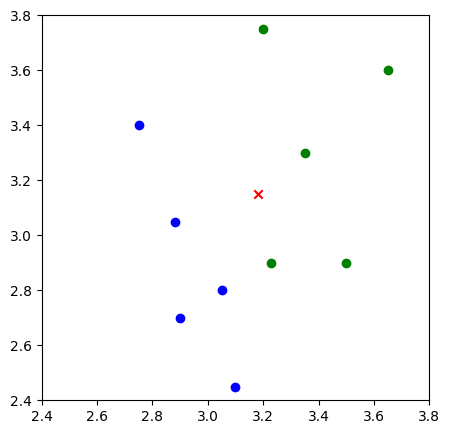

In [11]:
# Class'ları renkli olarak grafikte görelim

plt.figure(figsize=(5,5))
#eksenlerin başlama ve bitiş değerleri:
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))

#.iloc[], veri çerçevesi içindeki belirli satır ve sütunları seçmek için kullanılır 
#burada :5 ifadesi ilk 5 elemanı, 0 ve 1 ise (x,y) indexler, anlamına geliyor yani ilk satırın xi ve karşılığı

plt.scatter(x_df.iloc[:5,0], x_df.iloc[:5,1], c="b") #ilk 5 eleman A ve mavi renk
plt.scatter(x_df.iloc[5:,0], x_df.iloc[5:,1], c="g") #5ten sonraki elemanlar B ve yeşil renkte

# tahmin etmek istediğimiz nokta: [3.18，3.15]
plt.scatter([3.18],[3.15], c='r', marker="x")

plt.show()

**Mesafeleri  Hesaplama**
İki türlü yapılabilir: Manhattan Distance ve Euclidean Distance

Manhattan Distance: İki nokta arasındaki dik mesafeleri (90 derecelik dönüş) hesaplar.
$$d_{man}=\sum_{i=1}^{N}\left | X_{i}-Y_{i} \right |$$

Euclidean Distance: İki nokta arasındaki en kısa mesafeyi (Öklid uzaklığı) hesaplar.
$$d_{euc}= \sqrt{\sum_{i=1}^{N}(X_{i}-Y_{i})^{2}}$$

In [12]:
def manhattan(x,y):
    
    #mesafeyi hesaplayalım
    d= np.sum(np.abs(x-y)) #formül
    return d

In [13]:
#Koordinat düzleminde x ve y noktaları oluşturup onlar arasındaki mesafeyi hesaplıyoruz

x=np.array([3,5])
print("x:", x)

y=np.array([6,9])
print("y:", y)

#mesafe:
d_man= manhattan(x,y)
print(d_man)

x: [3 5]
y: [6 9]
7


In [14]:
def euclidean(x,y):
    d=np.sqrt(np.sum(np.square(x - y))) #formül
    return d

In [15]:
#x ve y noktalarını oluşturacağız

x=np.array([3,5])
print("x:", x)

y=np.array([6,9])
print("y:", y)

#mesafe:
d_euc= euclidean(x,y)
print(d_euc)

x: [3 5]
y: [6 9]
5.0


**Karar Verme**

In [16]:
#Çoğunluk yöntemi, Çoğunluk sıralması yapan fonksiyon
#veri setindeki sınıfların sayısını hesaplayan ve en fazla sayıda bulunan sınıfı öne çıkaran bir "çoğunluk yöntemi" uygulama

import operator #farklı işlevleri  yerine getirmek için kullanılır, burada itemgetter için

def cogunluk_yontem(class_count):
    sotred_class_count= sorted(class_count.items(),
                              key=operator.itemgetter(1),
                              reverse=True)
    #itemgetter=bir sözlüğü veya başka bir veri yapısını alır, bu veri yapısındaki öğeleri belirli bir anahtara (key) göre sıralar ve sıralanmış öğeleri bir liste olarak döndürür.
    """ key=operator.itemgetter(1) ifadesi, bu öğelerin sıralanmasında kullanılacak anahtarın, yani öğe değerinin (value) 1. indeksi olduğunu belirtir. 
    Son olarak, reverse=True ile büyükten küçüğe doğru ters sıralama yapılır. """
    return sotred_class_count

In [17]:
#bir dictionary tanımlayalım
arr= {'A': 3, 'B': 2, "C": 6, "D": 5}#burada 4 sınıf ve kaç yane oldukları yazıyor

#oluşturduğumuz fonksiyonu kullanarak sınıfların sayısını büyükten küçüğe yazalım
cogunluk_yontem(arr)

[('C', 6), ('D', 5), ('A', 3), ('B', 2)]

**KNN Uygulama**

In [18]:
def knn(test_data, train_data, labels, k):
    
   # Mesafeler için boş bir list oluşturalım
    distances= np.array([])
    
    #Euclidean ile mesafe hesabı
    """train data bizim bildiğimi noltalar ve biz her birinin bilinmeyen 
    noktaya olan uzaklığını hesaplayacağız. Bu da each (her bir) datadır.
    Knnde her zaman elimizde bütün data vardır buna train data diyeceğiz
    test data ise bulmaya çalıştığımız nokta olacak. Test_datanıjn 
    kordinatlarını verip çıktı olarak each_data bulacağız yani çıktı iki 
    sınıftaan biri olacak bu yüzden test_data x diğeri y oluyor."""
    for each_data in train_data:
        d= euclidean(test_data, each_data)
        #sonra bulduğumuz mesafeyi(d) mesafeler listesine ekliyoruz
        distances=np.append(distances, d)
    
    # Mesafeleri sırala ve sıralı indexleri al
    sorted_distance_index= distances.argsort() #küçükten büyüğe sıralama
    sorted_distance =np.sort(distances)
    
    # Yarıçapı hesapla (k-1 indexli eleman son elemandır)
    r= (sorted_distance[k]+sorted_distance[k-1])/2
    """k=3 diyelim ysni 3 adet nokta var indexleri ise 0,1,2 şeklindedir.
    k-1 ise 2 yapar ve son elemanı temsil eder"""
    
    class_count= {} #çoğunluk olan classı tutacak
    
    #Çoğunluk Yöntemi
    for i in range(k):
        vote_label= labels[sorted_distance_index[i]] #komşunun etiketini alır
        class_count[vote_label]= class_count.get(vote_label, 0) +1 
        """hangi sınıftan kaç tane olduğunu tutan class_count'un içine etiketleri koyar.
        Değerler 0dan başlar ve eklendikçe artar."""
        
    # sınıf değeri yani seçilen class (label)
    final_label= cogunluk_yontem(class_count)
    
    return final_label, r

**Sınıflandırma Tahmini**

In [19]:
# tahmin noktamız bizim test datamız olacak
test_data = np.array([3.18,3.15])

# knn() fonksiyonunu çağıralım k = 5 için
final_label, r= knn(test_data, features, labels, 5)

In [20]:
print(final_label)

[('B', 3), ('A', 2)]


In [21]:
print(r)

0.4517360073513873


**Sonuç Görselleştirme**

In [22]:
# K = 5 için elde ettiğimiz yarıçap (r) için bir çember çizelim

# Polar coordinates：a=x=r*cosθ，b=y=r*sinθ.
def cember(r, a, b):  
    theta = np.arange(0, 2*np.pi, 0.01) #theta değerleri, çemberin çevresini oluşturan noktaların açılarını temsil eder.
    x = a+r * np.cos(theta)
    y = b+r * np.sin(theta)
    return x, y

In [23]:
# cember() fonksiyonunu çağırıp, 
# çemberin her bir noktası için x ve y değerlerini alalım

k_circle_x, k_circle_y = cember(r, 3.18, 3.15)

In [24]:
k_circle_x

array([3.63173601, 3.63171342, 3.63164566, 3.63153274, 3.63137467,
       3.63117145, 3.63092313, 3.63062971, 3.63029122, 3.62990771,
       3.62947921, 3.62900576, 3.62848741, 3.62792421, 3.62731622,
       3.6266635 , 3.62596611, 3.62522413, 3.62443762, 3.62360667,
       3.62273136, 3.62181178, 3.62084802, 3.61984017, 3.61878834,
       3.61769263, 3.61655315, 3.61537002, 3.61414335, 3.61287326,
       3.61155989, 3.61020336, 3.60880382, 3.60736139, 3.60587623,
       3.60434848, 3.60277829, 3.60116583, 3.59951125, 3.59781473,
       3.59607642, 3.5942965 , 3.59247515, 3.59061256, 3.5887089 ,
       3.58676438, 3.58477918, 3.5827535 , 3.58068754, 3.57858152,
       3.57643564, 3.57425012, 3.57202517, 3.56976102, 3.5674579 ,
       3.56511602, 3.56273564, 3.56031699, 3.5578603 , 3.55536582,
       3.55283382, 3.55026452, 3.5476582 , 3.54501512, 3.54233554,
       3.53961972, 3.53686794, 3.53408047, 3.5312576 , 3.5283996 ,
       3.52550676, 3.52257937, 3.51961772, 3.51662211, 3.51359

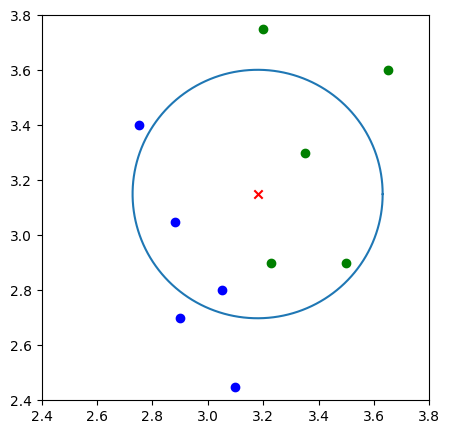

In [25]:
# Class'ları renkli olarak grafikte görelim
plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))

# mecvut data
plt.scatter(x_df.iloc[:5,0], x_df.iloc[:5,1], c="b")
plt.scatter(x_df.iloc[5:,0], x_df.iloc[5:,1], c="g")

# tahmin etmek istediğimiz nokta: [3.18，3.15]
plt.scatter([3.18],[3.15],c="r",marker="x")

# çemberi çizelim
plt.plot(k_circle_x, k_circle_y)

plt.show()